## Title: Introduction to Approximate Bayesian Computation
### Author: Andrea Giussani
#### Series in "The Long Beard Blog" - Oct 2020

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
def get_distance(x_start, new_x_count):
    square_diff_list = []
    for idx, elem in enumerate(new_x_count):
        square_diff_list.append(pow(elem - x_start[idx], 2))
    return math.sqrt(sum(square_diff_list))

In [3]:
def genetic_linkage(n_sim, n_sample):
    theta_list = []
    distance_list = []
    output_list = []
    for elem in range(n_sim):
        theta = random.uniform(0, 1)
        prob_vec = [(0.5 + theta/4), ((1-theta)/2), (theta/4)]
        new_x = random.choices(range(1,4), weights=prob_vec, k=n_sample)
        new_x_count = [new_x.count(elem) for elem in range(1,4)]
        dist = get_distance(x_start, new_x_count)
        theta_list.append(theta)
        distance_list.append(dist)
        output_list.append((theta, dist))
    return output_list, theta_list, distance_list
    
    

In [4]:
x_start = (125, 38, 34)
output_list, theta_list, dist_list = genetic_linkage(n_sim=100000, n_sample=197)

In [5]:
data = pd.DataFrame(output_list, columns=['theta', 'distance'])
data.head()

,theta,distance
0,0.771028,22.627417
1,0.492547,12.328828
2,0.248526,50.219518
3,0.087905,62.032250
4,0.205806,74.712783


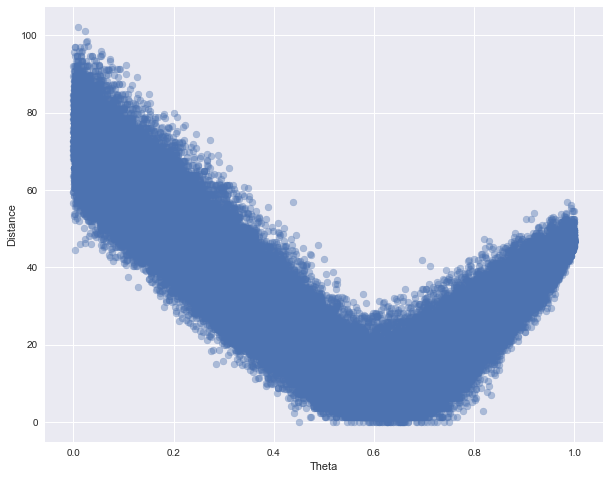

In [6]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize=(10,8))
    ax.scatter(data['theta'], data['distance'], alpha=0.4)
    ax.set_xlabel('Theta')
    ax.set_ylabel('Distance')
    plt.show()

In [7]:
fact01 = data.query("distance  == 0").count().values[0]
print(f"Number of Simulated Data with Sufficient Statistics equal to the Observed Data: {fact01}")

Number of Simulated Data with Sufficient Statistics equal to the Observed Data: 61


In [8]:
filtered_data = data.query("distance < 3")
fact02 = filtered_data['distance'].count()
print(f"Number of Simulated Data with Sufficient Statistics equal to the Observed Data with threshold of 3: {fact02}")

Number of Simulated Data with Sufficient Statistics equal to the Observed Data with threshold of 3: 1043


In [9]:
mean_post = filtered_data["theta"].mean()
print(f'Mean Approximate Posterior Distribution: {mean_post}')

Mean Approximate Posterior Distribution: 0.622839749696031


In [10]:
std_post = filtered_data['theta'].std()
print(f'Std Approximate Posterior Distribution: {std_post}')

Std Approximate Posterior Distribution: 0.051529746678416345
